In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("~/Desktop/Datasets/Chess_Datasets/games.csv", encoding='latin1')
df = df[::-1]

In [53]:
for index, row in df.iterrows():
    if row['Result'] == "Jan-00":
        df.at[index, 'Result'] = "1-0"

In [54]:
df = df.reset_index(drop=True)

In [55]:
df.head(50)

,White,Black,Result
0,"Karpov, Anatoly","Kasparov, Garry",½-½
1,"Kasparov, Garry","Karpov, Anatoly",½-½
2,"Karpov, Anatoly","Kasparov, Garry",1-0
3,"Kasparov, Garry","Karpov, Anatoly",½-½
4,"Karpov, Anatoly","Kasparov, Garry",½-½
5,"Kasparov, Garry","Karpov, Anatoly",0-1
6,"Karpov, Anatoly","Kasparov, Garry",1-0
7,"Kasparov, Garry","Karpov, Anatoly",½-½
8,"Karpov, Anatoly","Kasparov, Garry",1-0
9,"Kasparov, Garry","Karpov, Anatoly",½-½


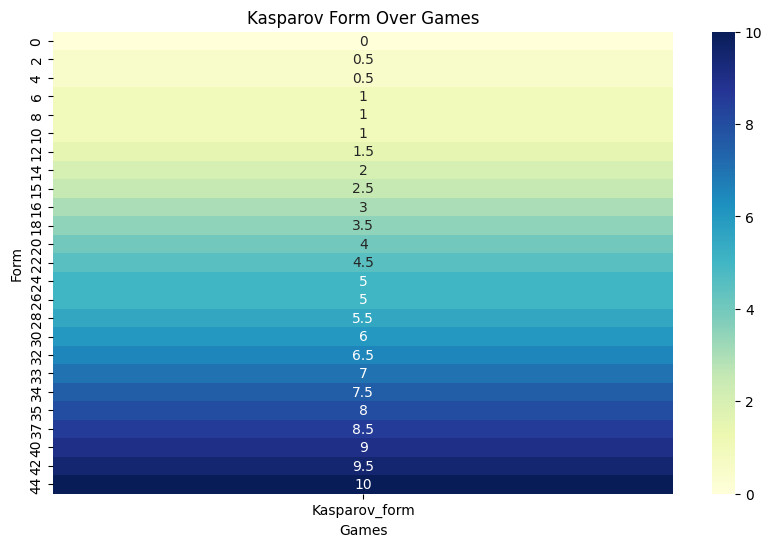

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with columns ['White', 'Black', 'Result']

# Initialize a new column for Kasparov's form
df['Kasparov_form'] = 0.0

# Calculate Kasparov's form for each game
for i in range(1, len(df)):
    previous_results = df.loc[(df['Black'] == 'Kasparov, Garry') & (df.index < i), 'Result']
    victories = sum(previous_results == '0-1')
    draws = sum(previous_results == '½-½')
    df.loc[i, 'Kasparov_form'] = victories + 0.5 * draws

# Drop the rows where Kasparov is not player 2
df = df[df['Black'] == 'Kasparov, Garry']

# Convert Kasparov_form to float
df['Kasparov_form'] = df['Kasparov_form'].astype(float)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Kasparov_form']], annot=True, cmap="YlGnBu", cbar=True)
plt.title('Kasparov Form Over Games')
plt.xlabel('Games')
plt.ylabel('Form')
plt.show()


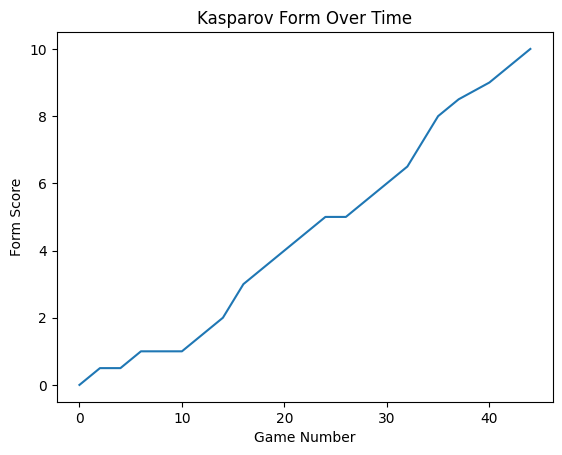

In [57]:
df['Kasparov_form'].plot(kind='line')
plt.title('Kasparov Form Over Time')
plt.xlabel('Game Number')
plt.ylabel('Form Score')
plt.show()

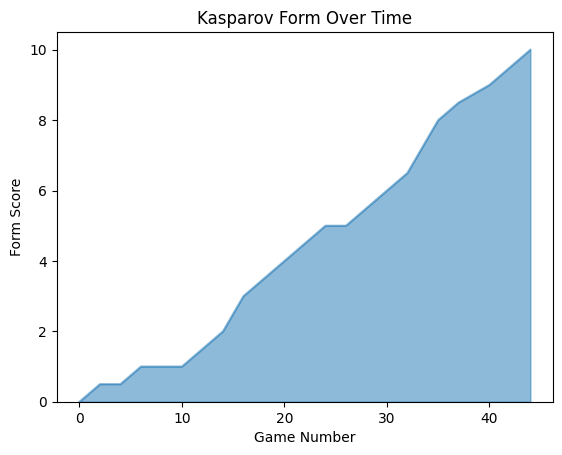

In [58]:
df['Kasparov_form'].plot(kind='area', alpha=0.5)  # alpha sets the transparency
plt.title('Kasparov Form Over Time')
plt.xlabel('Game Number')
plt.ylabel('Form Score')
plt.show()

In [59]:
df.head(50)

,White,Black,Result,Kasparov_form
0,"Karpov, Anatoly","Kasparov, Garry",½-½,0.0
2,"Karpov, Anatoly","Kasparov, Garry",1-0,0.5
4,"Karpov, Anatoly","Kasparov, Garry",½-½,0.5
6,"Karpov, Anatoly","Kasparov, Garry",1-0,1.0
8,"Karpov, Anatoly","Kasparov, Garry",1-0,1.0
10,"Karpov, Anatoly","Kasparov, Garry",½-½,1.0
12,"Karpov, Anatoly","Kasparov, Garry",½-½,1.5
14,"Karpov, Anatoly","Kasparov, Garry",½-½,2.0
15,"Karpov, Anatoly","Kasparov, Garry",½-½,2.5
16,"Karpov, Anatoly","Kasparov, Garry",½-½,3.0
